# Finch Carr - Lab 05
## 5A) Looking at the Data

In [118]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle as pk
import h5py
%matplotlib inline

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [119]:
pickle_higgs = open('higgs_100000_pt_250_500.pkl', 'rb')
higgs = pk.load(pickle_higgs)
print(higgs.ndim, higgs.size)
higgs

2 1400000


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


### Overview:
- In this lab we wil be searching for the standard model Higgs boson in proton-proton colliosons at $\sqrt{s} = 13$ TeV with simulated data from the Large Hadron Collider (LHC).
- Higgs bosons are produced with large transverse momentum (pT) and decay to a bottom quark-atiquart pair. Higgs canidates could be reconstructed as large-radius jets using Calorimeters. Because of a large QCD background signal that contaminates the data, 5-sigma observation of the Higgs has not been accomplished yet.
- The goal is to use our set of training datasets to optimize event selections in order to enhance sensitivity. The optimal event selections will be applied to a selected psudo-experimental data.

In [120]:
pickle_qcd = open('qcd_100000_pt_250_500.pkl', 'rb')
qcd = pk.load(pickle_qcd)
print(qcd.ndim, qcd.size)
qcd

2 1400000


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
99996,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
99997,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
99998,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


- We see that each row has 14 variables associated with it. Each row is defined by the papers included with our data as a jet that may or may not produce a signal for a Higgs boson particle. Narrowing the dataset to the rows with the most likely candidates for Higgs boson is our goal. Let's define our variables

## Lab 5b: Exploring Data
- Understanding the Physics of the Large Hadron Collider
  - A synchronous particle is a particle syncrhonized with the RF frequency.
  - A bunch is a clump of paricles around the sunchronous particle. LHC collides protons in bunches.
    - Each bunch travels at almost the speed of light.
- In particle physics, linear momentum is represented by:
  - $p =( p_T , \eta , \phi)$

### Variables
- Each dataset (Higgs and QCD) have 14 features: $p_T$, $\eta$ (eta), $\phi$ (phi), 'mass', $e_2$, $e_3$, $D_2$, 'angularity', $\tau_1$, $\tau_2$, $\tau_3$, $\tau_{21}$, $\tau_{32}$, $Kt\Delta R$
- $p_T$ - Transverse Momentum
   - According to the papers provided, all simulated datapoints require a minimum $p_T$ value of 250 GeV to be counted as a possible signal; our entire QCD and Higgs sets of points have minimum $p_T$ measurements of this value or greater
- $\eta$ (eta) - Psudorapidity
  - For true Higgs boson detections, the papers describe that when the minimum $p_T$ value is set to 250 GeV, the maximum value for $\left|\eta\right|$ is less than or equal to 2.0
- $\phi$ (phi) - Azimuthal Angle
- mass - Transverse Invariant Mass
- Energy Corelation Functions (ECF)
  - **$e_2$ -   2-point ECF**
  - **$e_3$ -   3-point ECF**
  - **$D_2$ -   ratio of ee2 and ee3** 
- Angularity
- $\tau_1$, $tau_2$, $\tau_3$, $\tau_{21)$, $\tau_{32}$ - N-subjettyness
- $Kt\Delta R$ - $\Delta R$ of two subjets within the large-R jet

In [32]:
#Define Higgs variables
hMass = higgs['mass']
hPt = higgs['pt']
hEta = higgs['eta']
hPhi = higgs['phi']
hEe2 = higgs['ee2']
hEe3 = higgs['ee3']
hD2 = higgs['d2']
hAngularity = higgs['angularity']
hT1 = higgs['t1']
hT2 = higgs['t2']
hT3 = higgs['t3']
hT21 = higgs['t21']
hT32 = higgs['t32']
hKtDeltaR = higgs['KtDeltaR']

# Do the same for QCD background
qMass = qcd['mass']
qPt = qcd['pt']
qEta = qcd['eta']
qPhi = qcd['phi']
qEe2 = qcd['ee2']
qEe3 = qcd['ee3']
qD2 = qcd['d2']
qAngularity = qcd['angularity']
qT1 = qcd['t1']
qT2 = qcd['t2']
qT3 = qcd['t3']
qT21 = qcd['t21']
qT32 = qcd['t32']
qKtDeltaR = qcd['KtDeltaR']


- Reading over the papers tells us there is a strong correlation between mass and transverse momentum ($p_T$) for any given dataset of Higgs signal detection

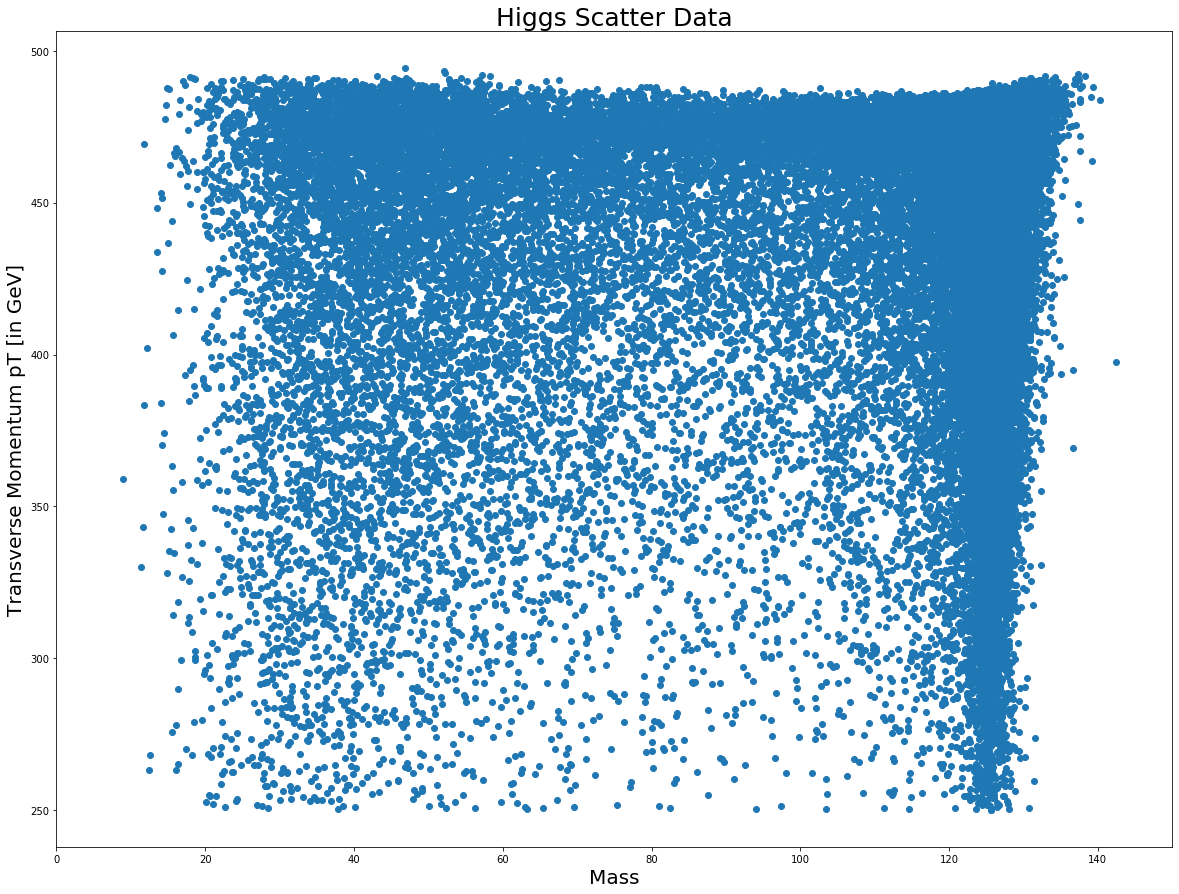

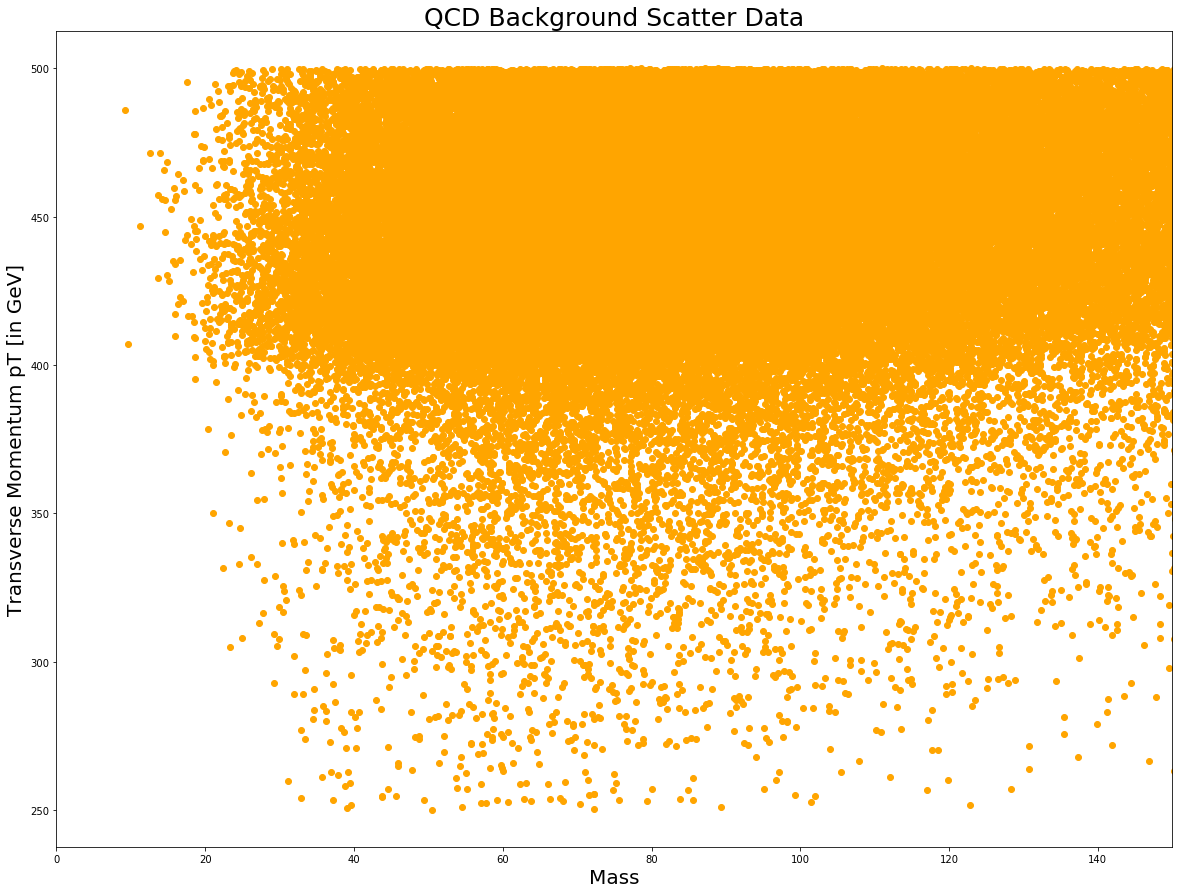

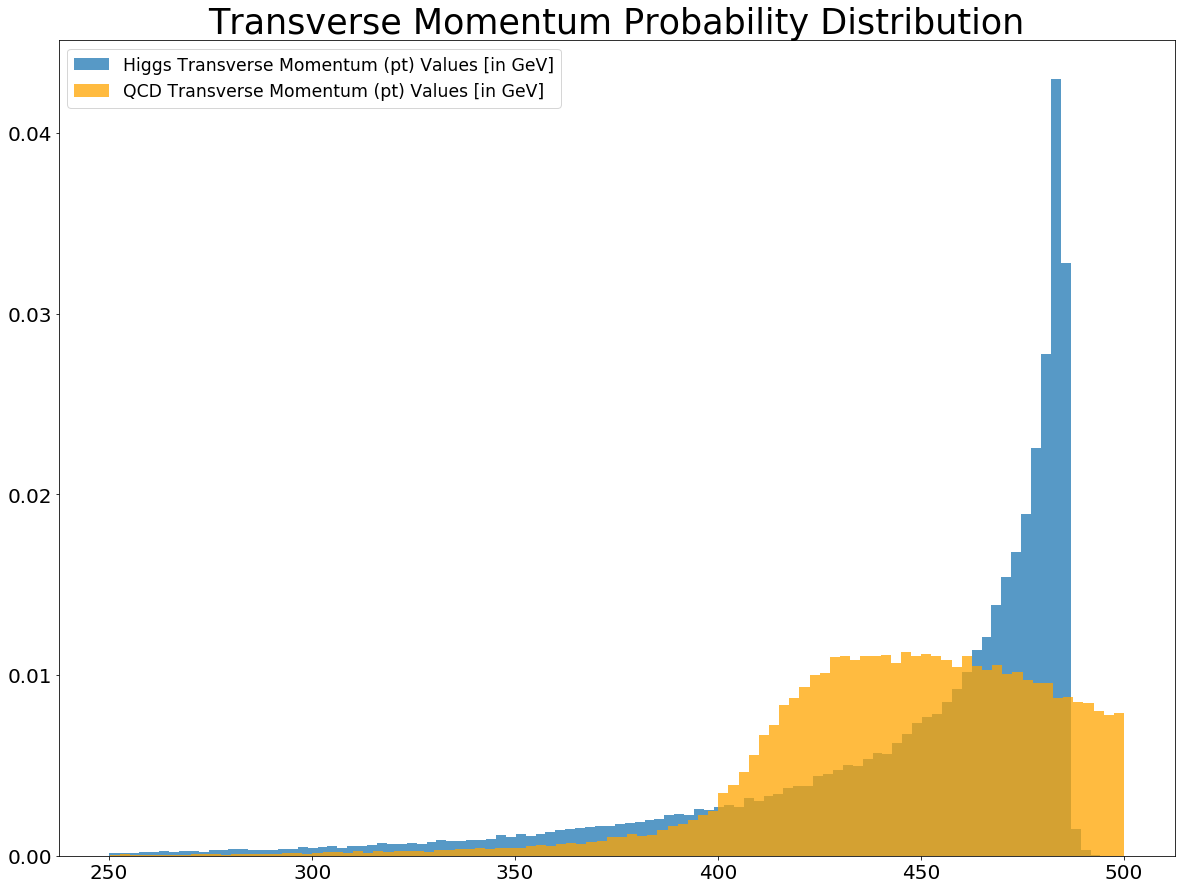

In [65]:
#Let's consider plotting a scatterplot between mass and transverse momentum like they do in the paper
fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(hMass, hPt)
plt.xlabel('Mass', size =20)
ax.set_xlim(0,150,20)
plt.ylabel('Transverse Momentum pT [in GeV]', size=20)
plt.title('Higgs Scatter Data', size=25)

# Do the same for the background data

fig, ax2 = plt.subplots(1,1)
#plt.yscale('log')
ax2.scatter(qMass, qPt, color='orange')
ax2.set_xlabel('Mass', size =20)
ax2.set_xlim(0,150,20)
plt.ylabel('Transverse Momentum pT [in GeV]', size=20)
plt.title('QCD Background Scatter Data', size=25)

fig, ax3 = plt.subplots(1,1)
ax3.hist(hPt, bins=100, label='Higgs Transverse Momentum (pt) Values [in GeV]', 
         density=True, alpha=0.75)
ax3.hist(qPt, bins=100, label='QCD Transverse Momentum (pt) Values [in GeV]', 
         density=True, color='orange', alpha=0.75)
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
ax3.set_title('Transverse Momentum Probability Distribution', size = 35)
ax3.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

- ***Eur. Phys. J. C 79 (2019) 836*** tells us that all jets with $p_T$ output of 250 GeV or higher, as well as pseudorapidity variable eta (noted as $|\eta|$) being held to an absolute value less than 2.0, are considered to be Large-R jets.  
- Columns for $p_T$ and $\eta$ are found in the data table. Surveying the table shows us that the consideration for phi is already applied to the data, so reapplying the ranges for $p_T$ is unnecessary.
  - Data for $|\eta|$ values greater than 2 are still present in the data, so we can apply a restriction on that column to further optimize our Higgs Data 
- We want to apply a mass window to the Higgs data like the one exemplified in the paper, since that will get rid of a lot of false positive measurements and keep a significant amount of true Higgs signals. The paper states that the **"Higgs boson mass distribution provides a powerful way to distinguish the Higgs boson signal from background processes."**

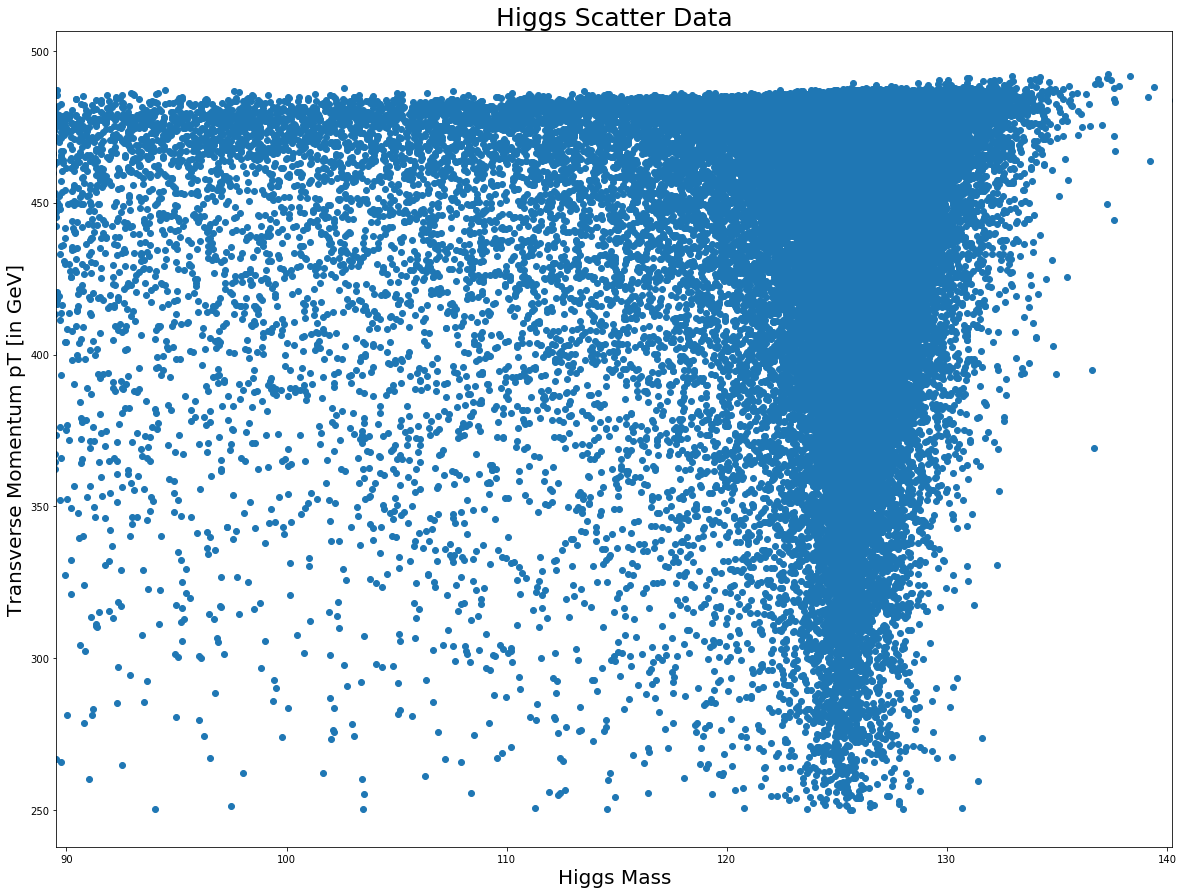

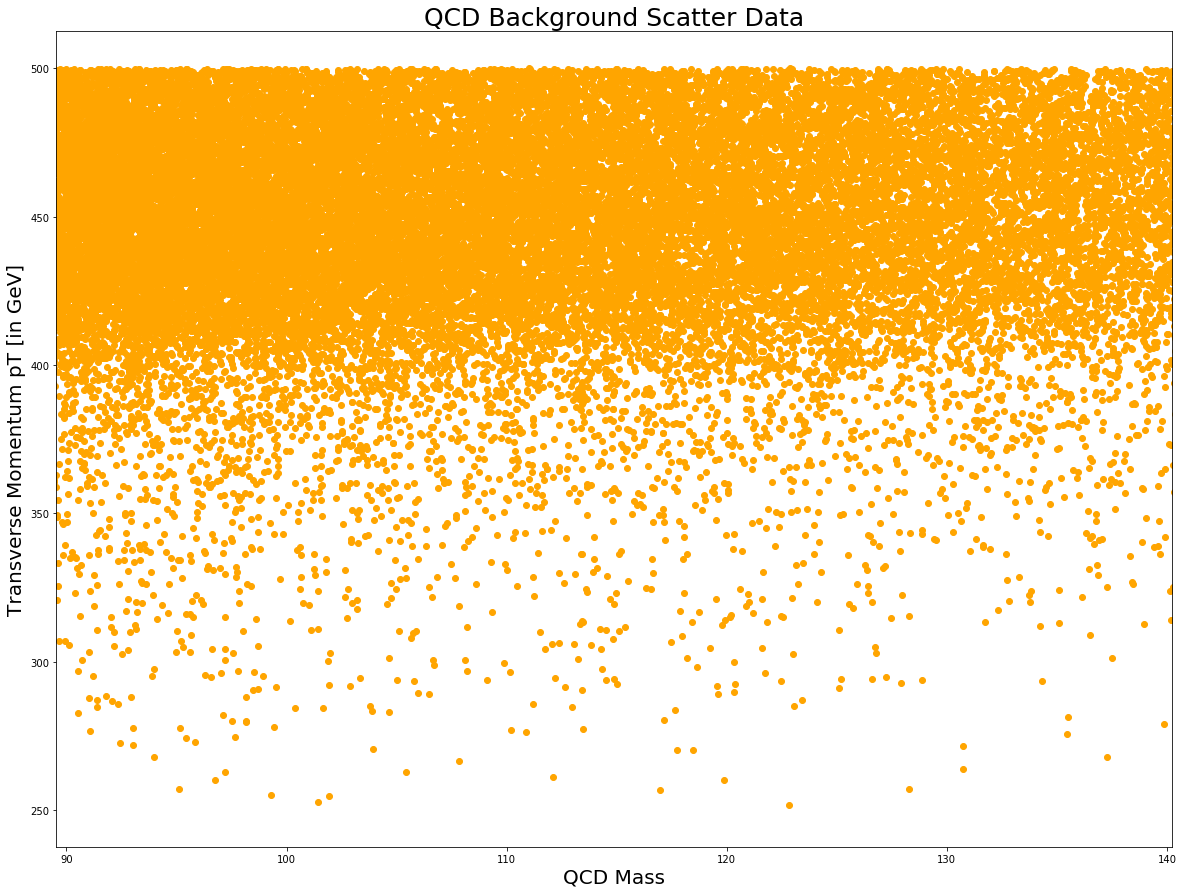

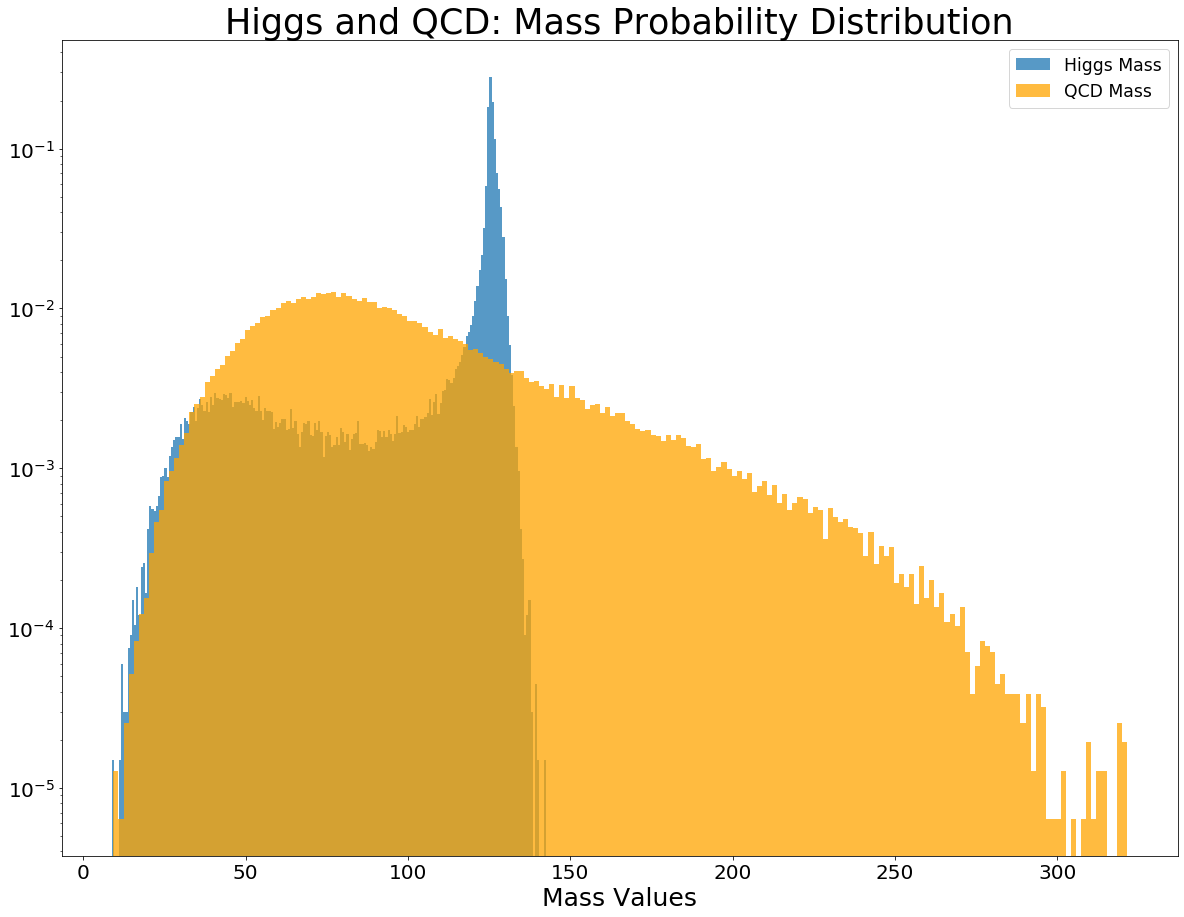

140.24345677740666


In [64]:
# Higgs plot with tight mass window (68% of Higgs Data)
MeanM = hMass.mean()
StdM = hMass.std()

fig, ax = plt.subplots(1,1)
ax.scatter(hMass, hPt)
plt.xlabel('Higgs Mass', size =20)
plt.ylabel('Transverse Momentum pT [in GeV]', size=20)
plt.title('Higgs Scatter Data', size=25)
plt.xlim(MeanM-StdM, MeanM+StdM)

# QCD Plot with tight mass window

fig, ax = plt.subplots(1,1)

ax.scatter(qMass, qPt, color='orange')
plt.xlabel('QCD Mass', size =20)
plt.ylabel('Transverse Momentum pT [in GeV]', size=20)
plt.title('QCD Background Scatter Data', size=25)
plt.xlim(MeanM-StdM, MeanM+StdM)

#Histogram of Mass Probabilities
fig, ax = plt.subplots(1,1)
ax.hist(hMass, bins = 200, alpha=0.75, label='Higgs Mass', density=True)
ax.hist(qMass, bins = 200, color='orange', alpha=0.75, label='QCD Mass', density=True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Mass Values', size = 25)
plt.yscale('log')
ax.set_title('Higgs and QCD: Mass Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

86711
86711


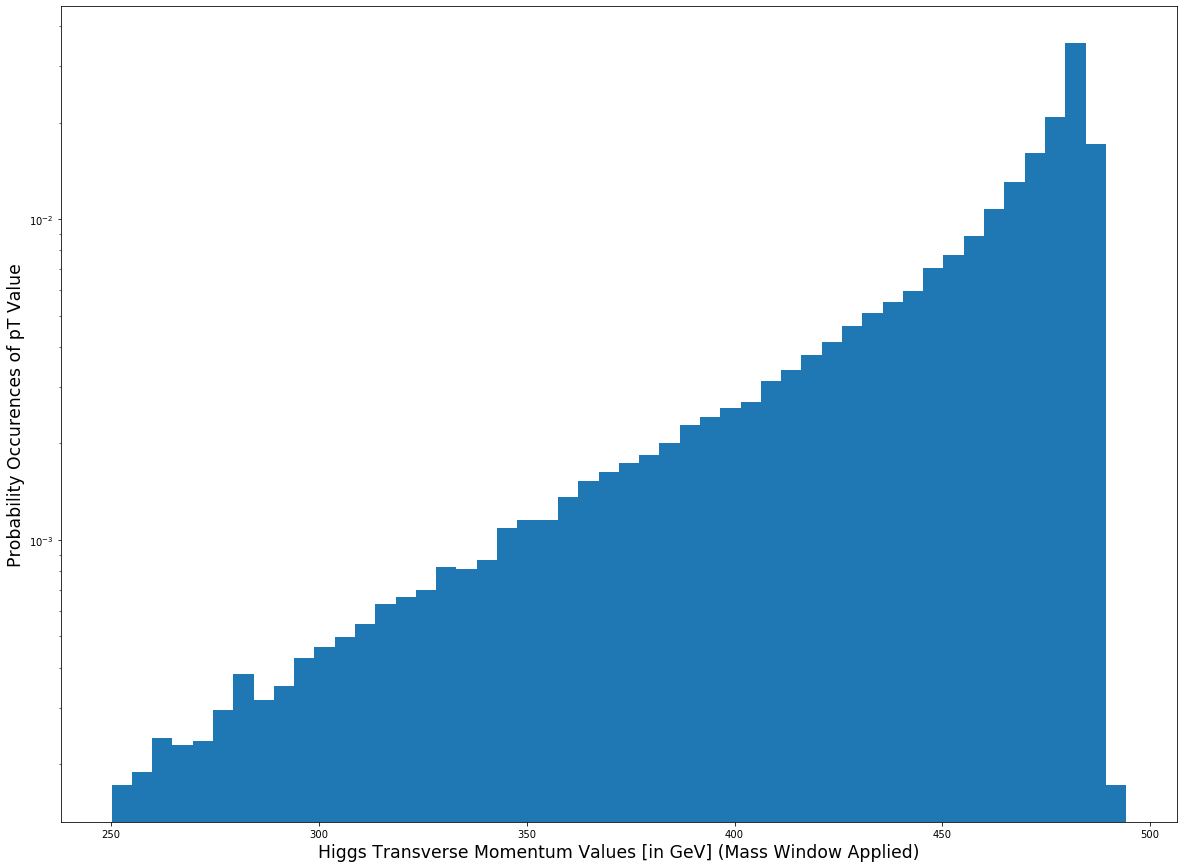

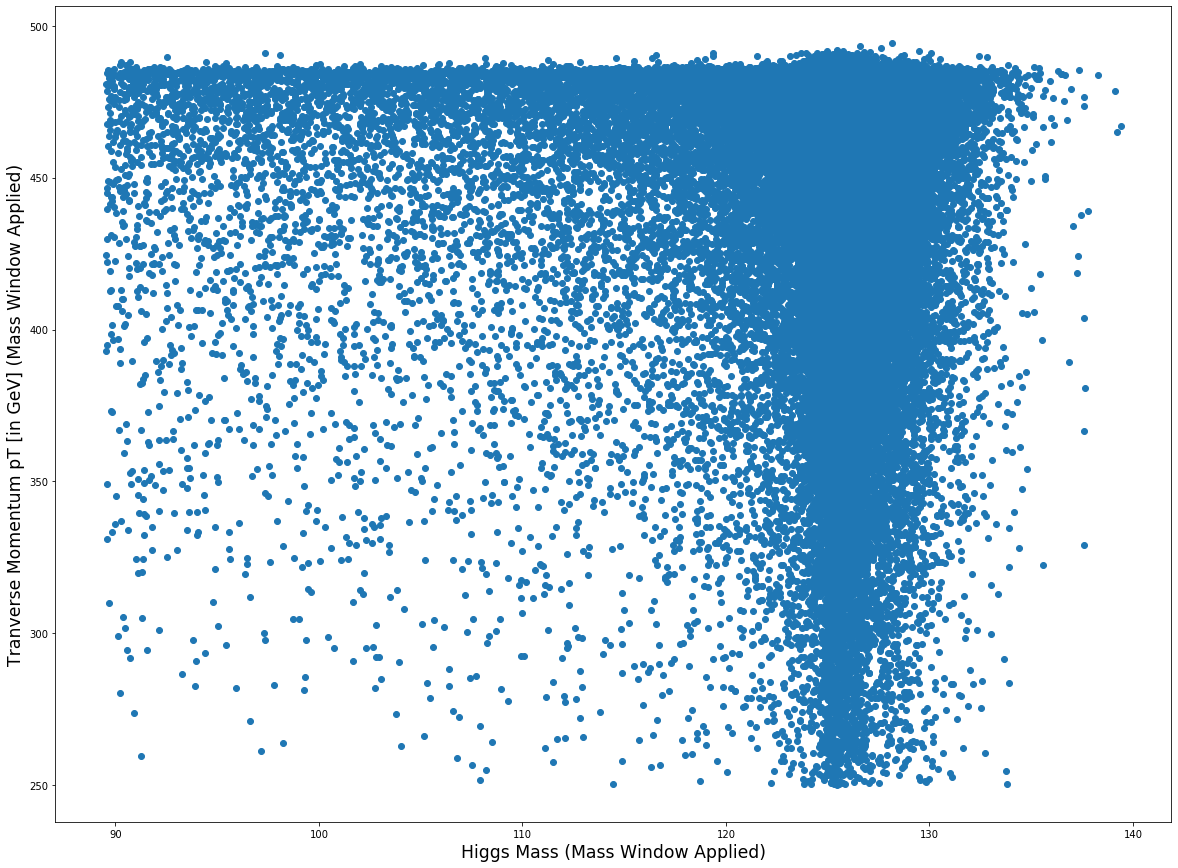

In [122]:
# We also want to make new Higgs data table with mass window applied
upper = MeanM + StdM
lower = MeanM - StdM
hMassSort = np.sort(hMass)
masswindow=[]
MWpt=[]
for i in range(len(hMassSort)):
    if hMassSort[i] <= (upper) and hMassSort[i] >= (lower):
        masswindow.append(hMassSort[i])
        MWpt.append(hPt[i])

print(len(masswindow))
print(len(MWpt))

# How does the probability distribution of the mass window pT values look?
fig, ax = plt.subplots(1,1)
ax.hist(MWpt, bins=50, density=True)
plt.xlabel('Higgs Transverse Momentum Values [in GeV] (Mass Window Applied)', fontsize='xx-large')
plt.ylabel('Probability Occurences of pT Value', fontsize='xx-large')
plt.yscale('log')


fig, ax = plt.subplots(1,1)
ax.scatter(masswindow, MWpt)
plt.xlabel('Higgs Mass (Mass Window Applied)', fontsize='xx-large')
plt.ylabel('Tranverse Momentum pT [in GeV] (Mass Window Applied)', fontsize='xx-large')
plt.show()

- Out of the 100000 signal measurements, applying the mass window returned a list of 86711 signals that fit the mass restrictions to stand as a Higgs signal measurement

98180
98180
Our new Eta-restricted Higgs data has an Eta minimum of -1.999945797902784 and a maximum of 1.999913222191202 so the window has been applied successfully for our new list of eta values


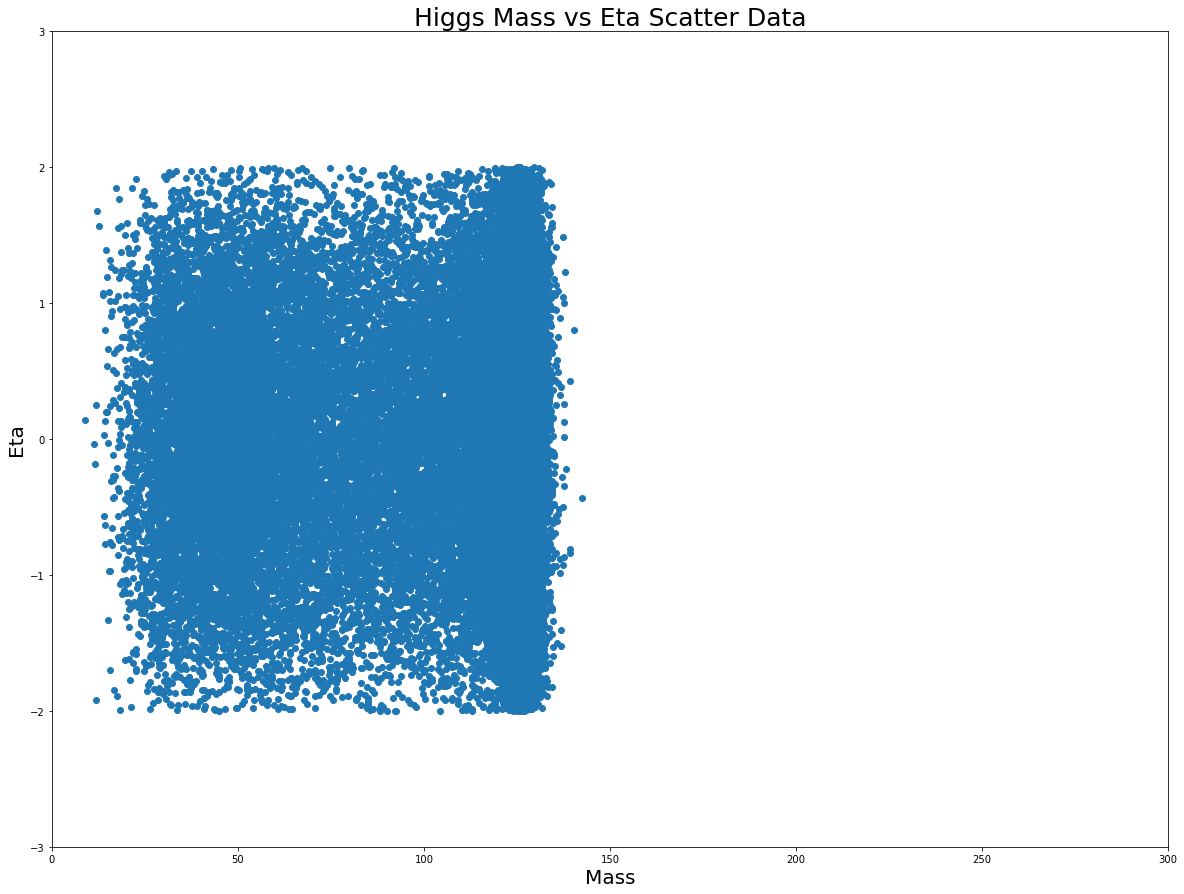

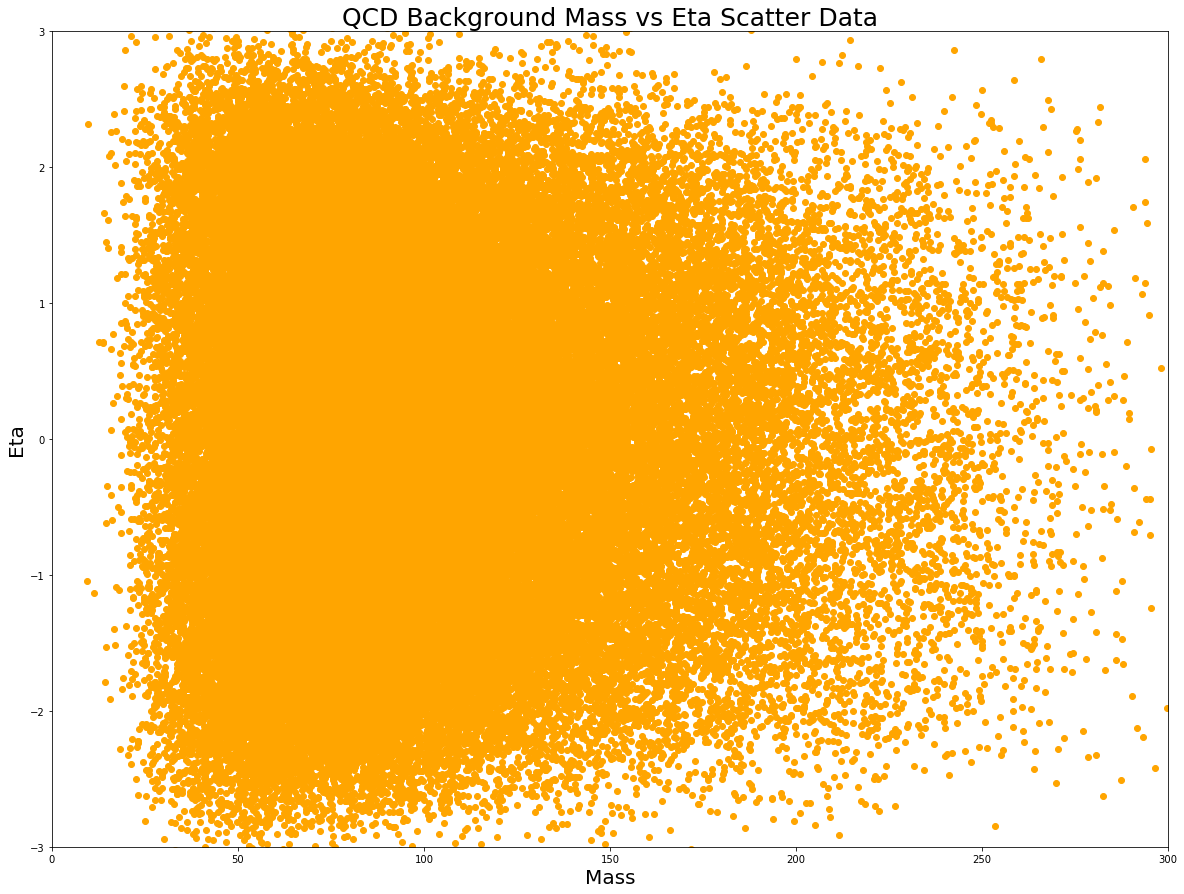

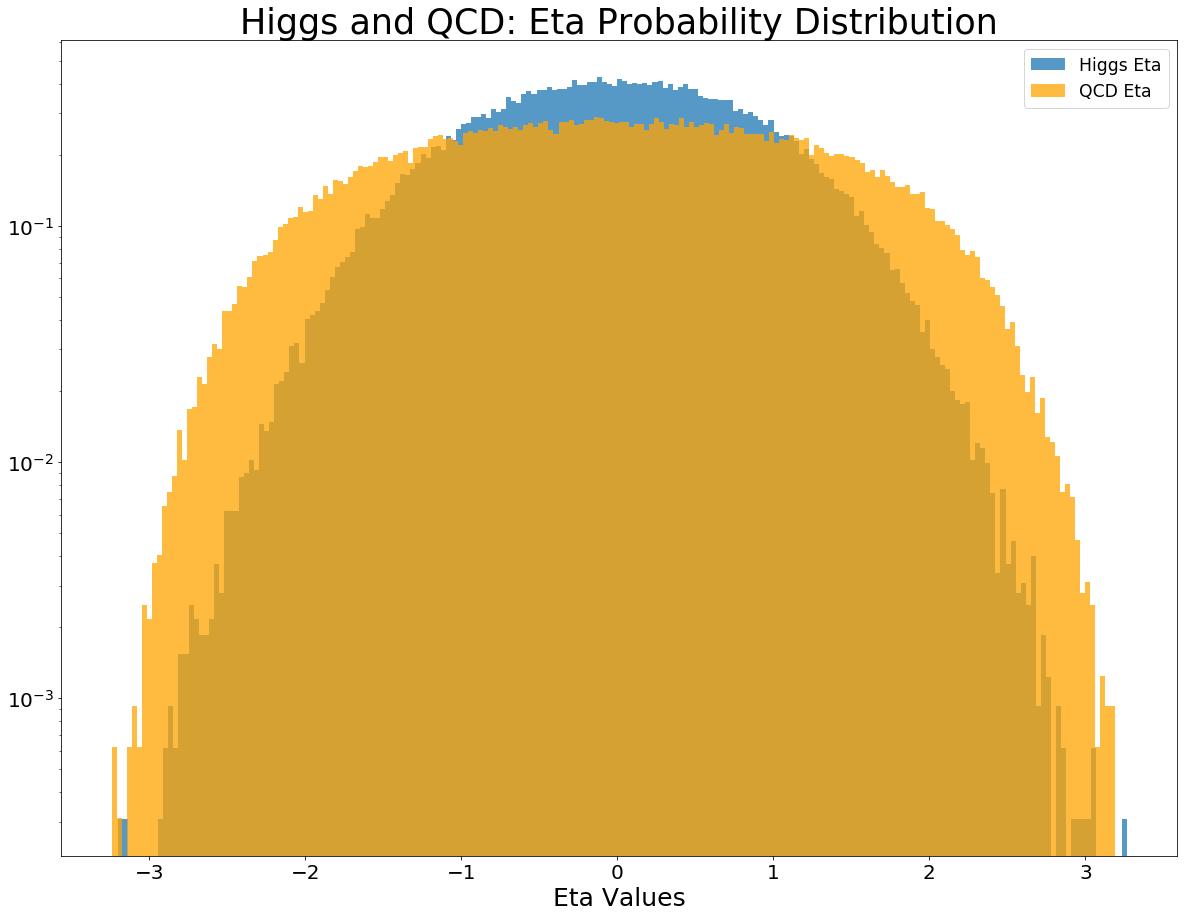

In [67]:
# We also want to apply Eta window to be 2.0 or less for Higgs data for a separate plot
hEta2 = []
mwEta = []
for i in range(len(hEta)):
    if np.abs(hEta[i]) <= 2.0:
        hEta2.append(hEta[i])
        mwEta.append(hMassSort[i])
print(len(hEta2))
print(len(mwEta))
print(f'Our new Eta-restricted Higgs data has an Eta minimum of {min(hEta2)}' 
      f' and a maximum of {max(hEta2)} so the window has been applied successfully'
      f' for our new list of eta values')

# Let's plot the Mass vs. Eta scatter plots
fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(mwEta, hEta2)
plt.xlabel('Mass', size=20)
plt.ylabel('Eta', size=20)
plt.xlim(0,300)
plt.ylim(-3,3)
plt.title('Higgs Mass vs Eta Scatter Data', size=25)

# Do the same for the background data
fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(qMass, qEta, color='orange')
plt.xlabel('Mass', size =20)
plt.ylabel('Eta', size=20)
plt.xlim(0,300)
plt.ylim(-3,3)
plt.title('QCD Background Mass vs Eta Scatter Data', size=25)

#Histogram of Eta Probabilities
fig, ax = plt.subplots(1,1)
ax.hist(hEta, bins = 200, alpha=0.75, label='Higgs Eta', density=True)
ax.hist(qEta, bins = 200, color='orange', alpha=0.75, label='QCD Eta', density=True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Eta Values', size = 25)
plt.yscale('log')
ax.set_title('Higgs and QCD: Eta Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')

plt.show()

- Looking at the Background and Higgs Distributions when they are plotted on the same axes, we see just how prevalent the QCD background is contaminating our Higgs signal data


- Exploring further, the phi ($\phi$) column in the data tables is representative for the azimuthal angle around the z-axis (along beam pipe in ATLAS detector) in a cylindrical coordinate system of (r, $\phi$)
  - The paper defines an angular distance of $\Delta R$ which is equal to $\sqrt{(\Delta\eta)^{2}+(\Delta\phi)^{2}}$

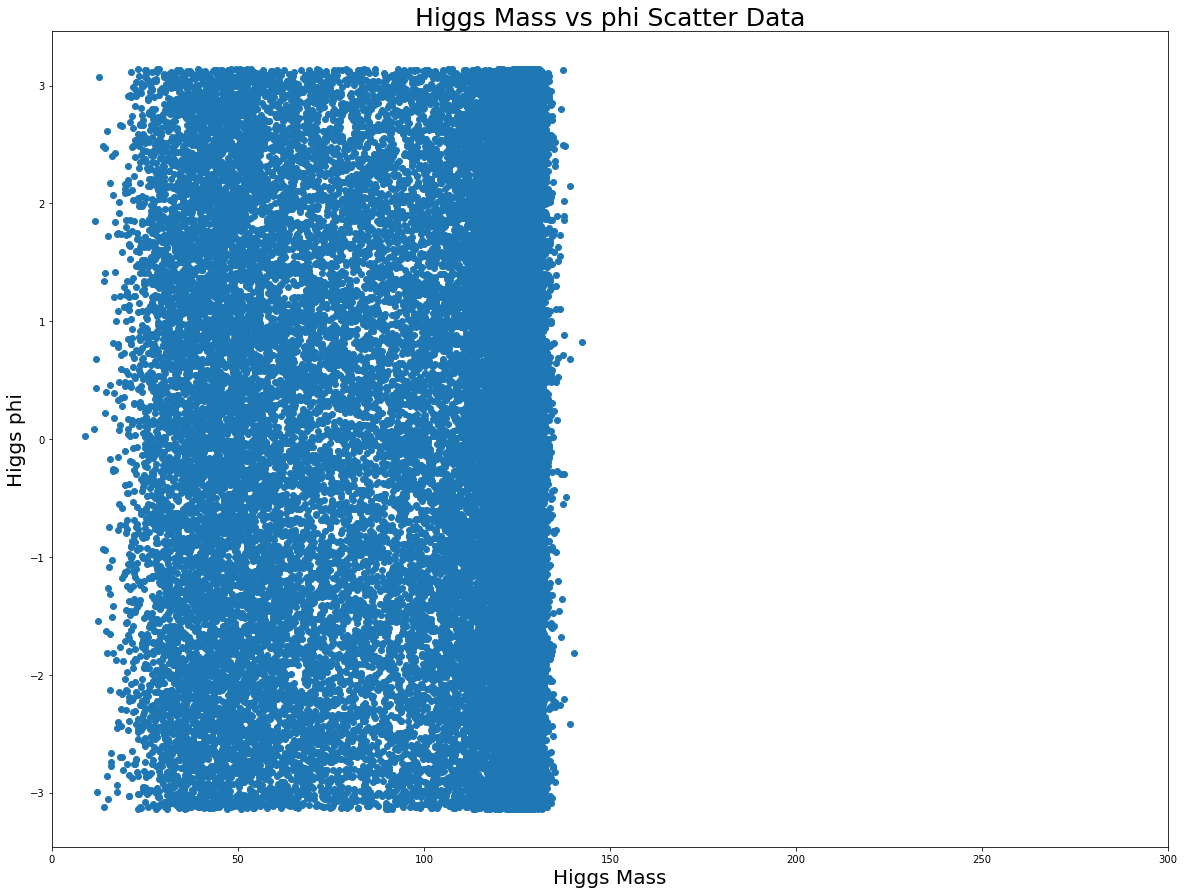

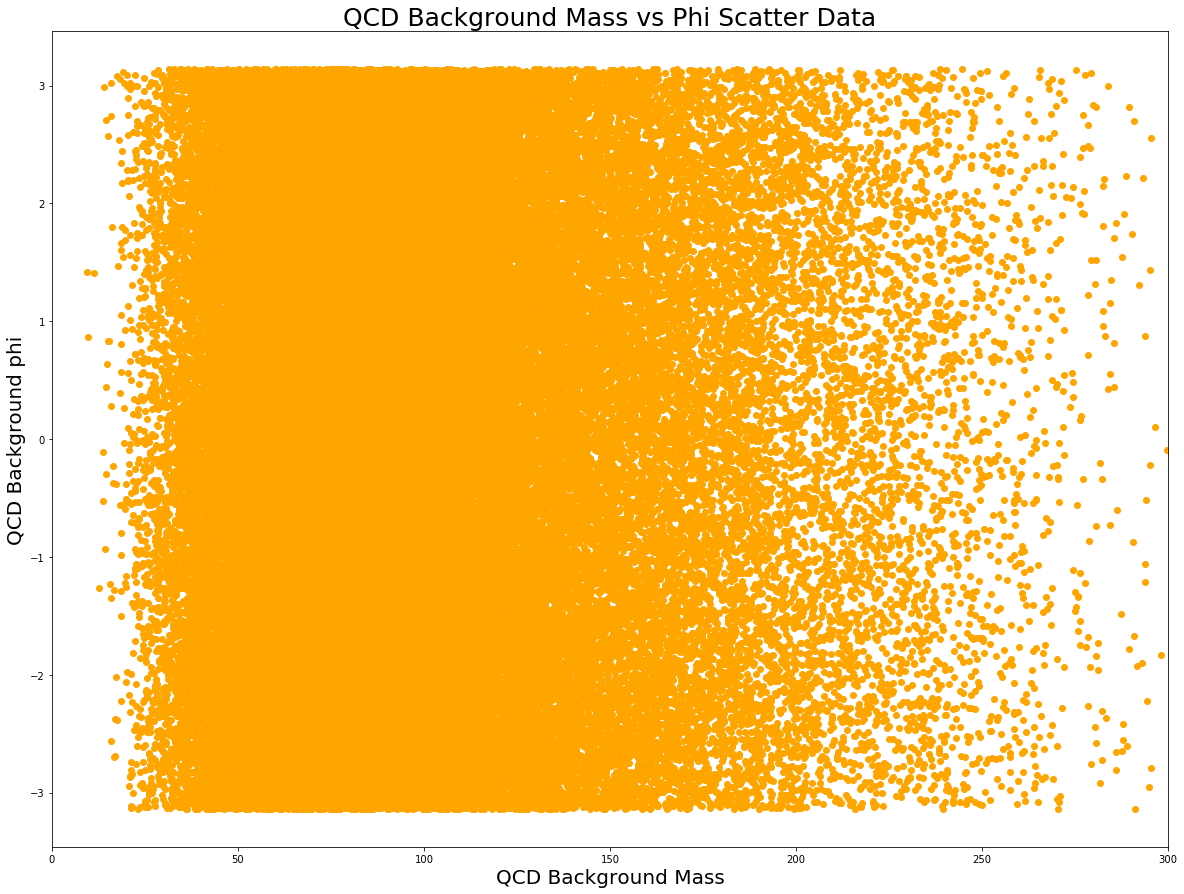

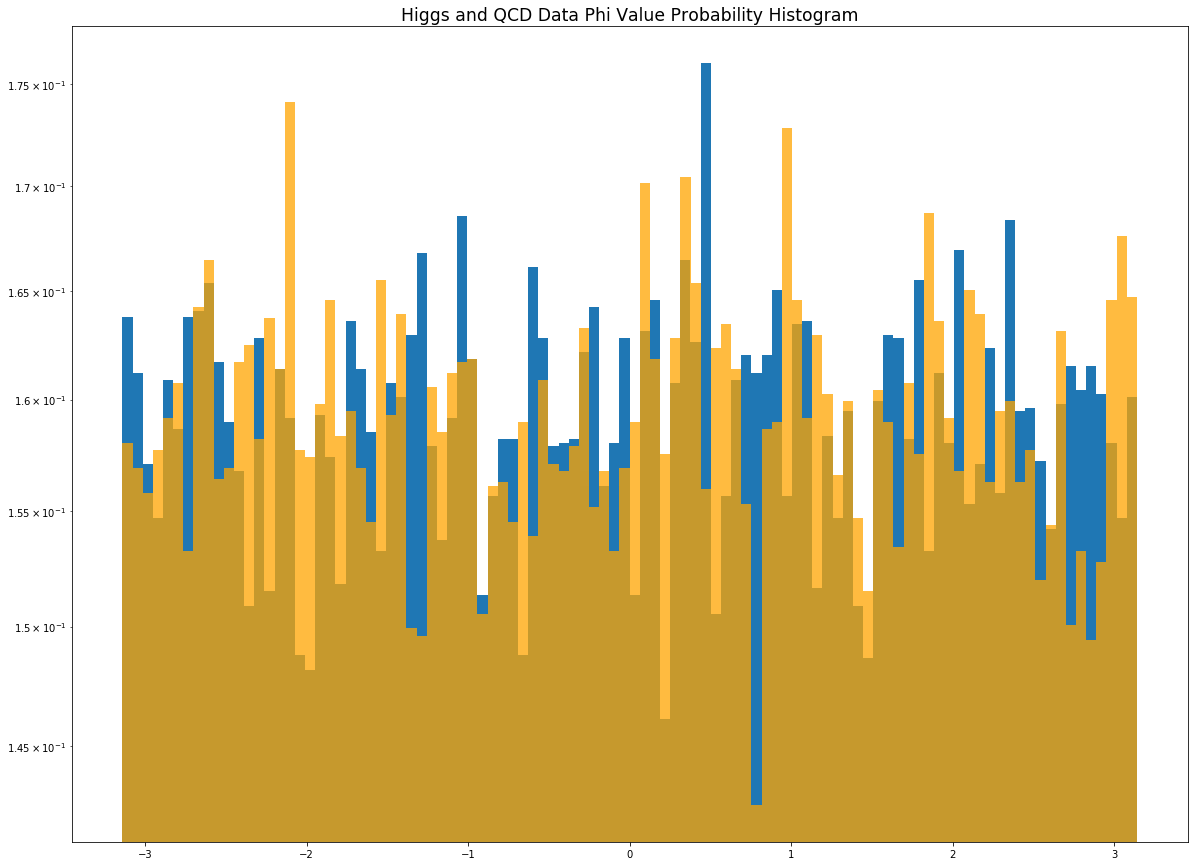

In [69]:
fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(hMass, hPhi)
plt.xlabel('Higgs Mass', size =20)
plt.ylabel('Higgs phi', size=20)
plt.xlim(0,300)
plt.title('Higgs Mass vs phi Scatter Data', size=25)

# Do the same for the background data
fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(qMass, qPhi, color='orange')
plt.xlabel('QCD Background Mass', size =20)
plt.ylabel('QCD Background phi', size=20)
plt.xlim(0,300)
plt.title('QCD Background Mass vs Phi Scatter Data', size=25)

# Histogram of both Probability Distributions
fig, ax = plt.subplots(1,1)
plt.yscale('log')
ax.hist(hPhi, bins=100, density=True)
ax.hist(qPhi, bins=100, density=True, color='orange', alpha=0.75)
plt.title('Higgs and QCD Data Phi Value Probability Histogram', fontsize='xx-large')
plt.show()
# Phi is NOT uniformly distributed as a variable in the data
plt.show()


### Energy Correlation Functions (ECF)
- N-point energy correlation functions are helpful in discriminating massive QCD jets from boosted, heavy objects. Measuring multiple energy correlation functions on a jet defines a multi-dimensional phase space populated by signal and background jets.
- The energy distribution resulting from hard scatterings can be described by energy correlation functions in momentum space.
  - In QCD this describes jet cross sections in terms of enery flow observables (peaked around the states associated with hard scattering) that initiate the jets.
- **2-point ECF $e_2$:** The measured value of ee2 defines the transverse momentum, splitting angle, and therefore defines the structure of the jet
- **3-point ECF $e_3$**
- The 2-point and 3-point energy correlation functions are powerful observables for identifying the hadronic decays of boosted Z bosons.
- **$D_2$** is a ratio of the 2-point and 3-point Energy Correlation Functions $D_2 = \frac{e_2}{{e_3}^3}$

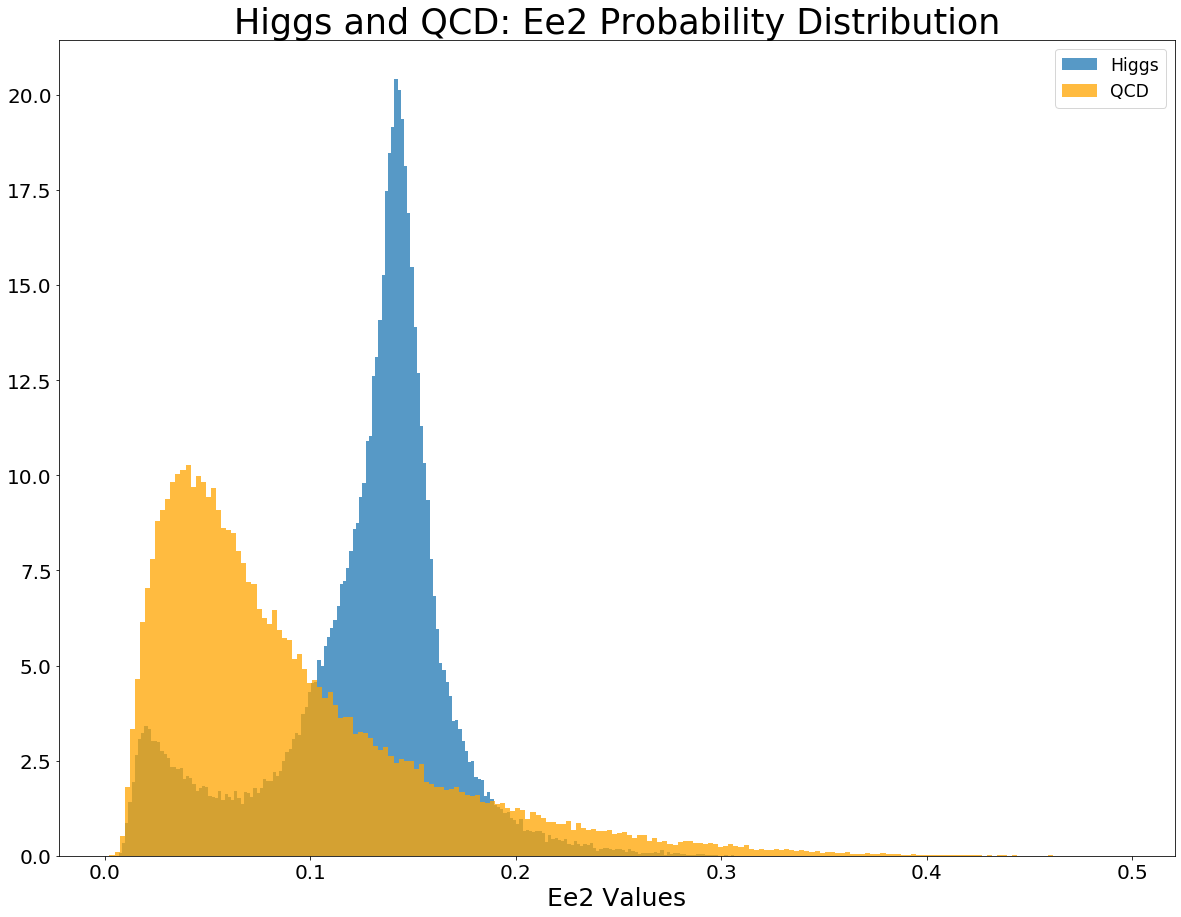

In [53]:
fig, ax = plt.subplots(1,1)
ax.hist(hEe2, bins = 200, alpha=0.75, label='Higgs', density=True)
ax.hist(qEe2, bins = 200, color='orange', alpha=0.75, label='QCD', density=True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Ee2 Values', size = 25)
#ax.set_ylabel('phi', size = 25)
ax.set_title('Higgs and QCD: Ee2 Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

### $D_2$ 
- As stated earlier, **$D_2$** is a ratio of the 2-point and 3-point Energy Correlation Functions $D_2 = \frac{e_2}{{e_3}^3}$

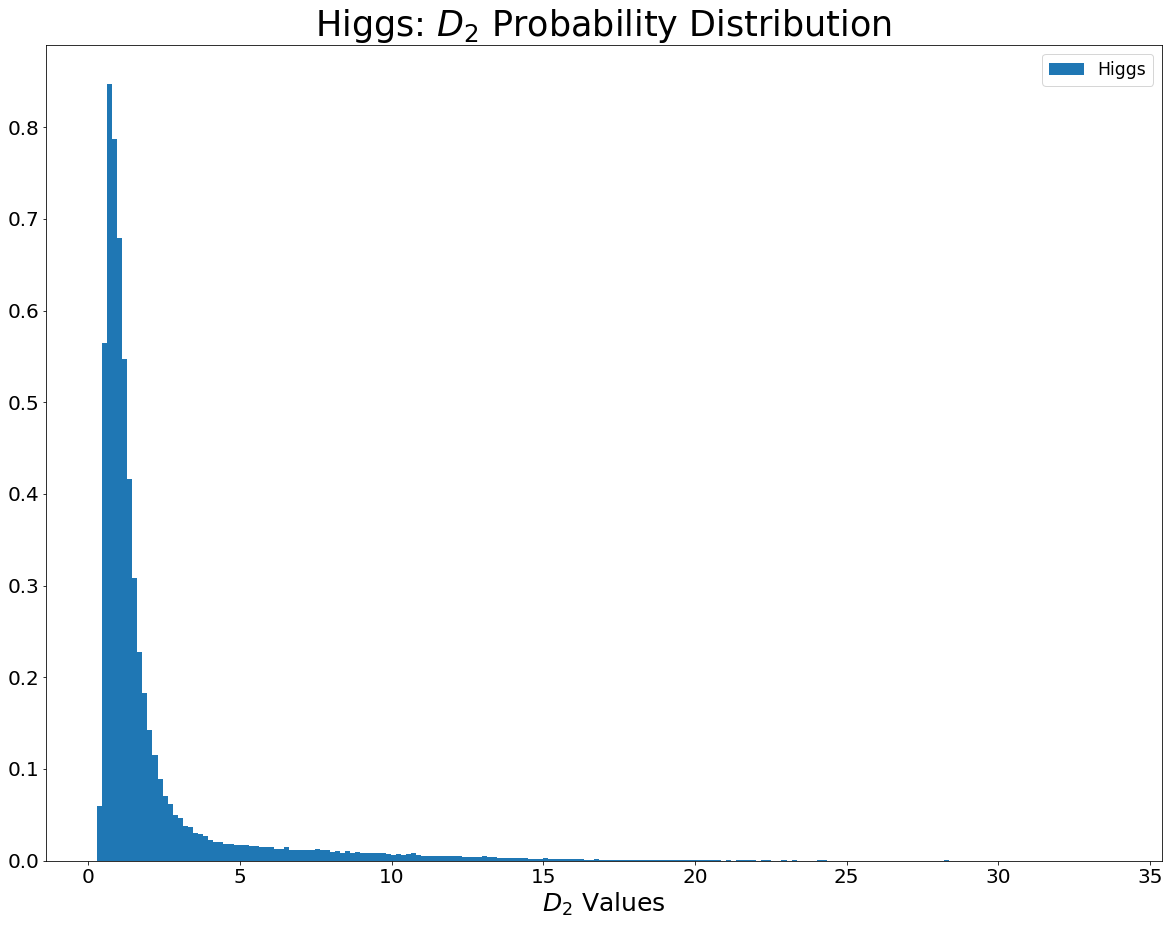

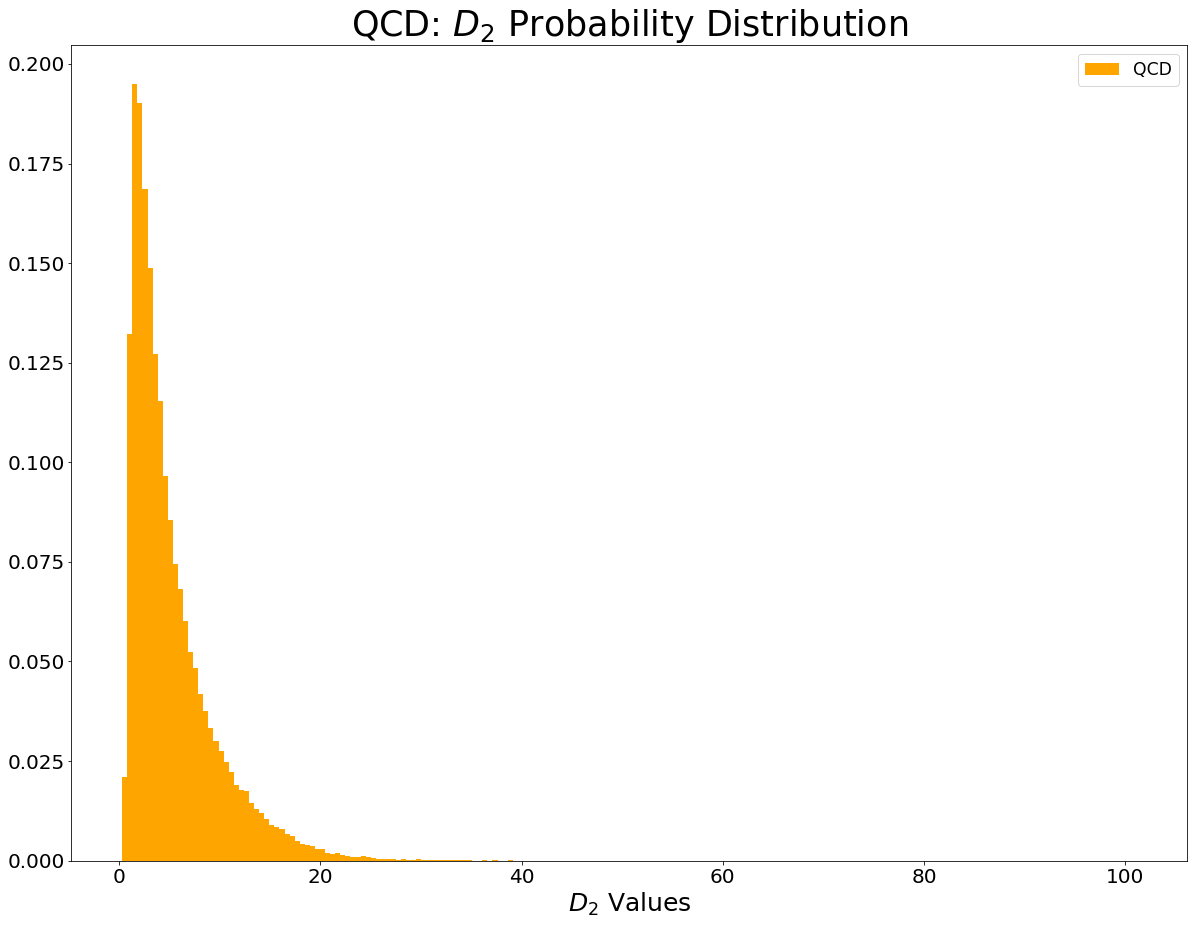

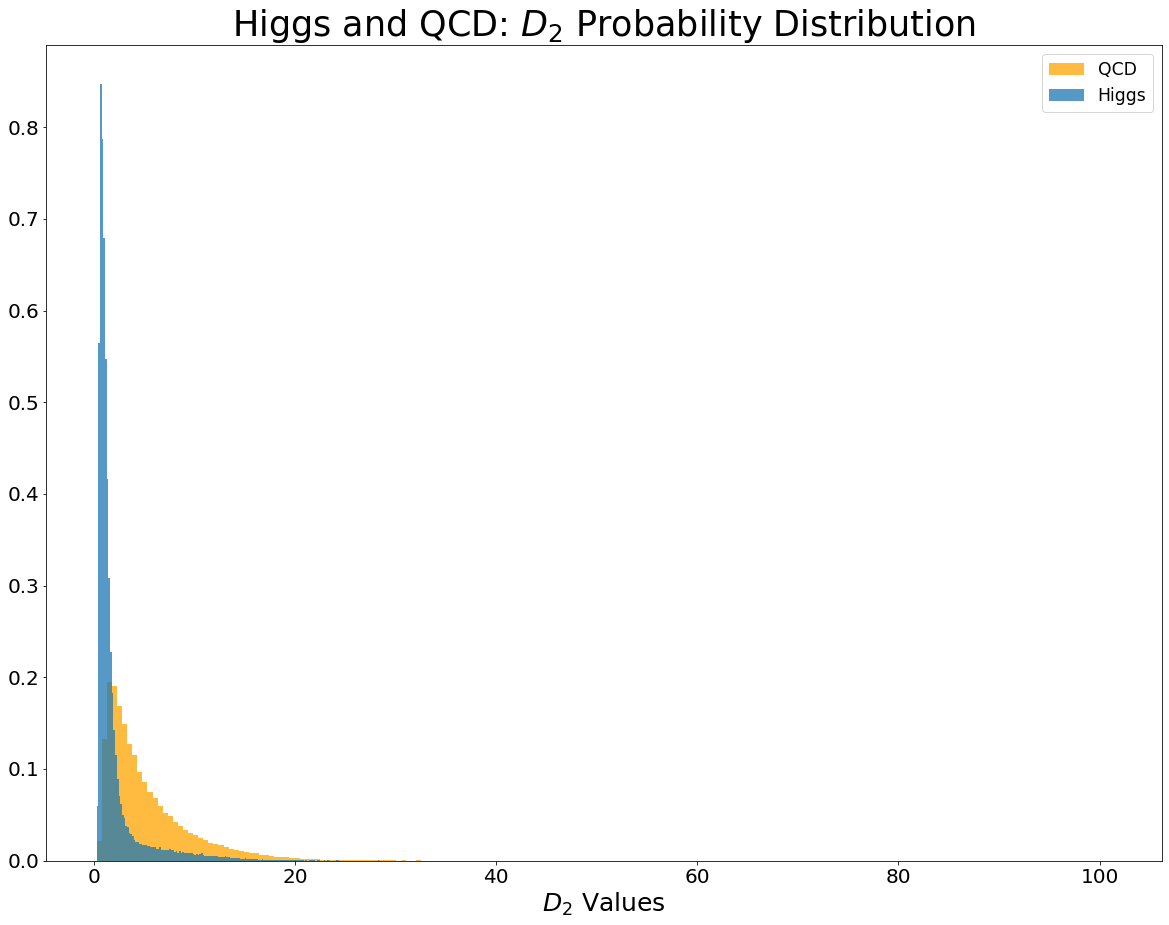

In [60]:
# D2 Probability Distribution
fig, ax = plt.subplots(1,1)
ax.hist(hD2, bins = 200, label='Higgs', density=True)
#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('$D_2$ Values', size = 25)
#ax.set_ylabel('phi', size = 25)
ax.set_title('Higgs: $D_2$ Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()


fig, ax = plt.subplots(1,1)
ax.hist(qD2, bins = 200, label='QCD', color='orange', density=True)
#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('$D_2$ Values', size = 25)
#ax.set_ylabel('phi', size = 25)
ax.set_title('QCD: $D_2$ Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')

# Both plots over one another
fig, ax = plt.subplots(1,1)
ax.hist(qD2, bins = 200, color='orange', alpha=0.75, label='QCD', 
        density=True)
ax.hist(hD2, bins = 200, alpha=0.75, label='Higgs', density=True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('$D_2$ Values', size = 25)
ax.set_title('Higgs and QCD: $D_2$ Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()
plt.show()

## Angularity
- observable quantity that is sensitive to the degree of symmetry in energy flow inside any given jet
  - It is largely uncorrelated with all other variables according to papers provided

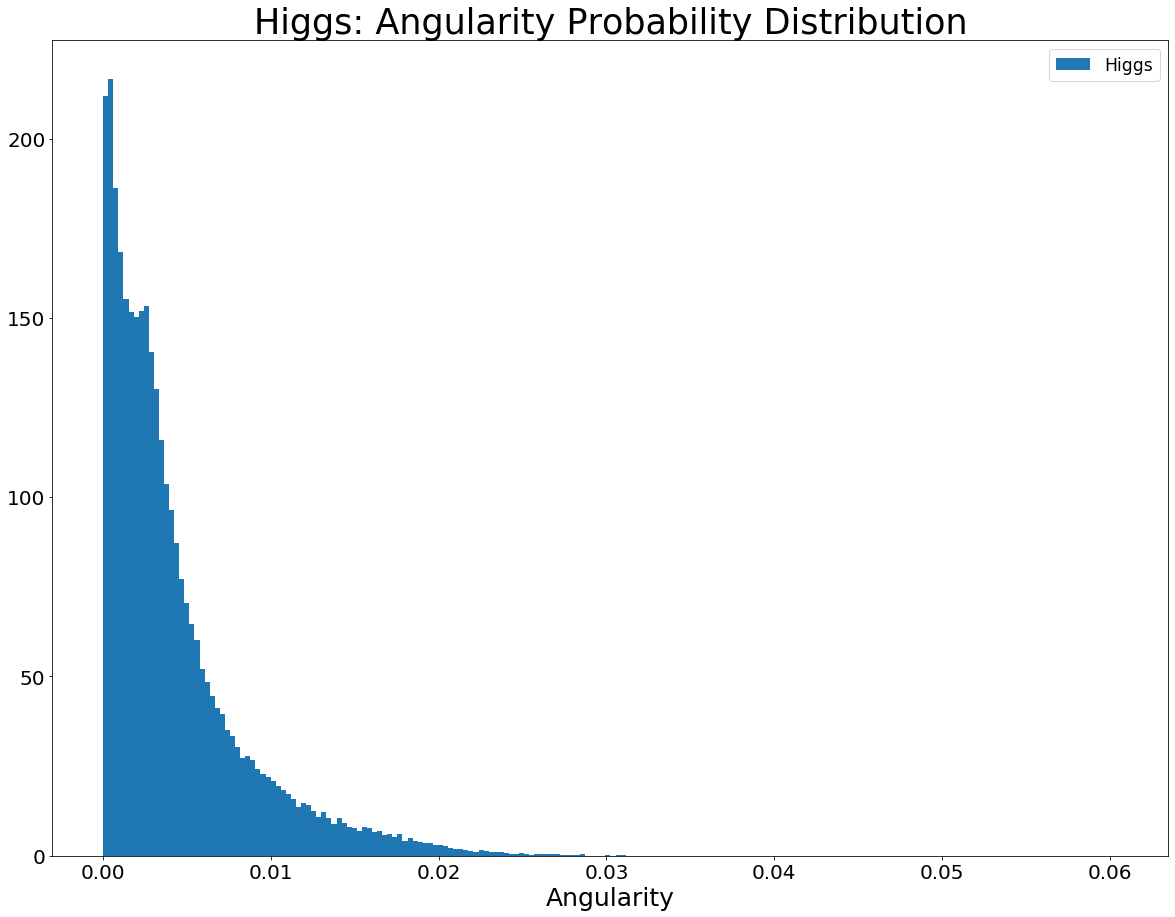

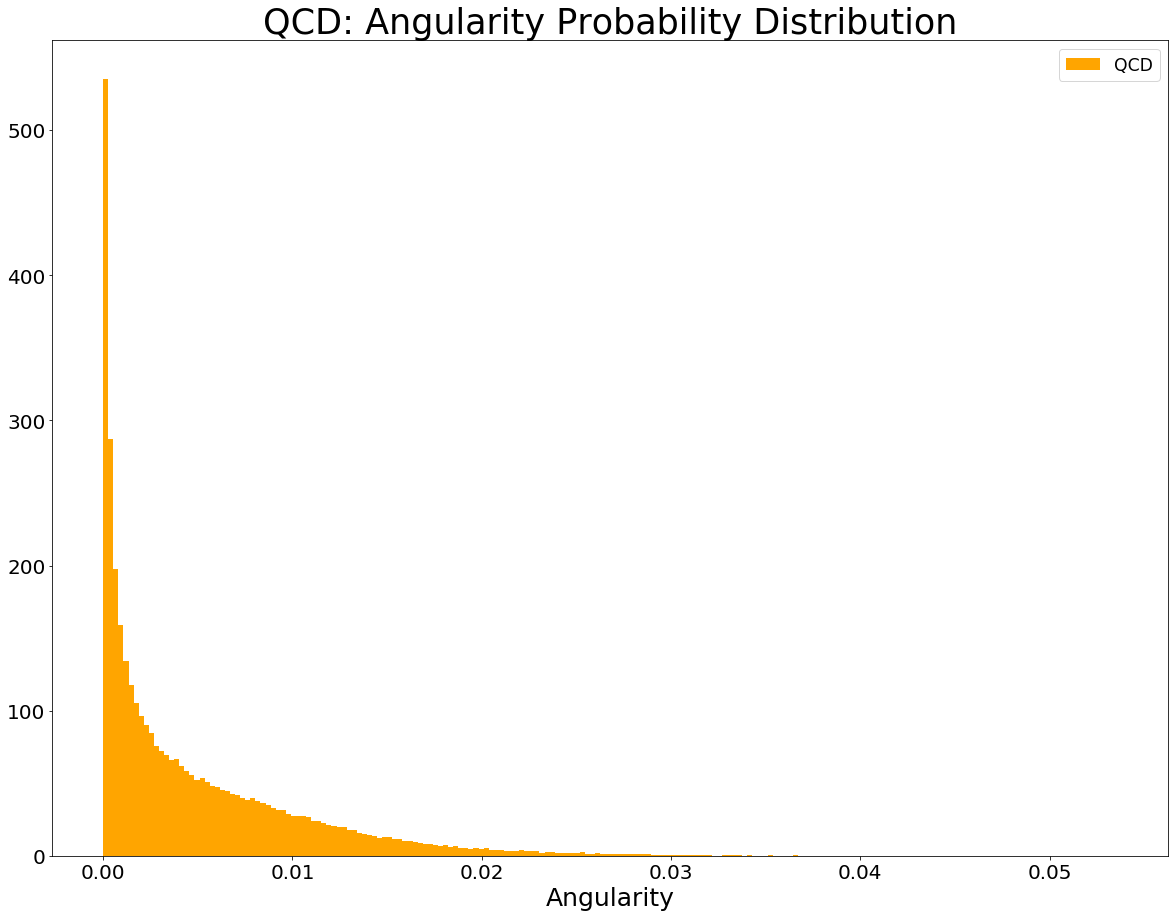

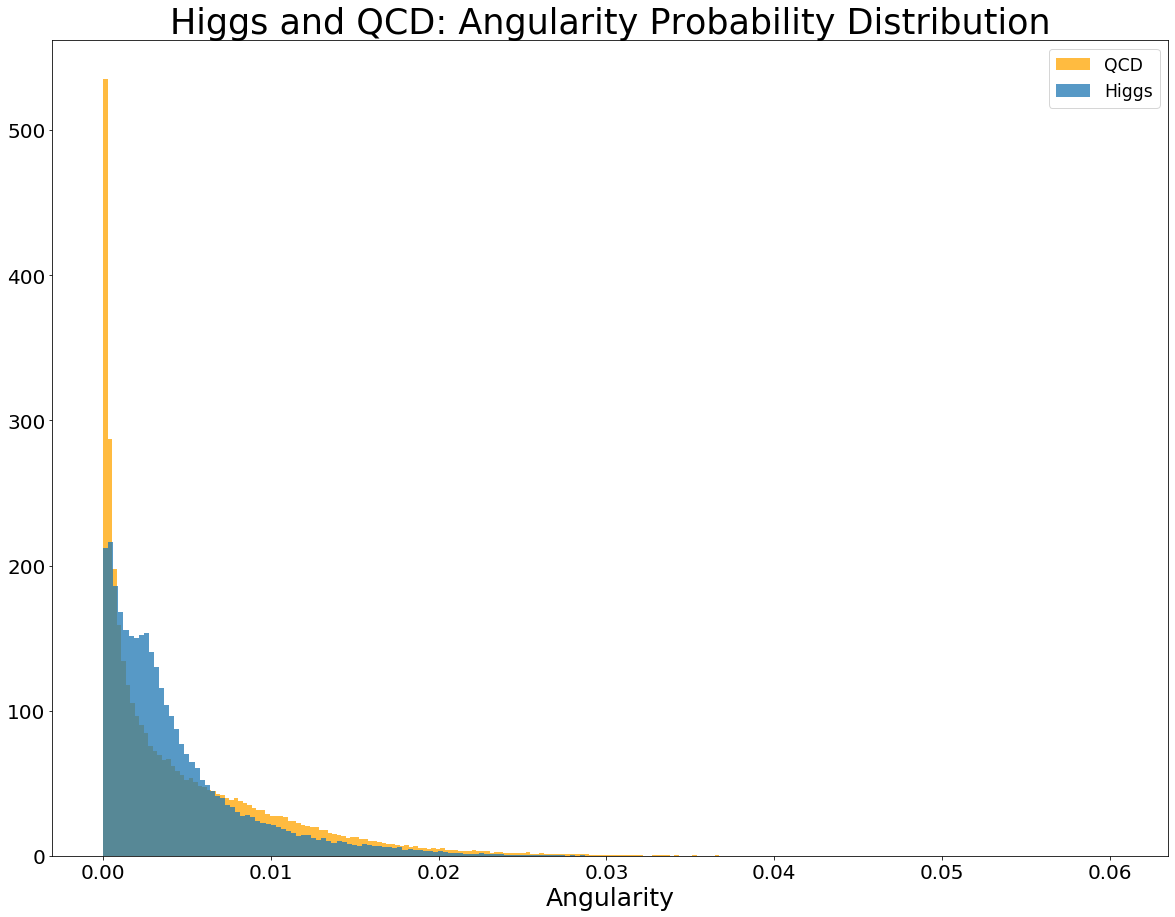

In [50]:
# Higgs Angularity Histogram 
fig, ax = plt.subplots(1,1)
ax.hist(hAngularity, bins = 200, label='Higgs', density=True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Angularity', size = 25)
ax.set_title('Higgs: Angularity Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

# QCD Angularity Histogram
fig, ax = plt.subplots(1,1)
ax.hist(qAngularity, bins = 200, color='orange', label='QCD', density=True)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Angularity', size = 25)
ax.set_title('QCD: Angularity Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

# Both plots over one another
fig, ax = plt.subplots(1,1)
ax.hist(qAngularity, bins = 200, color='orange', alpha=0.75, label='QCD', 
        density=True)
ax.hist(hAngularity, bins = 200, alpha=0.75, label='Higgs', density=True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Angularity', size = 25)
ax.set_title('Higgs and QCD: Angularity Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

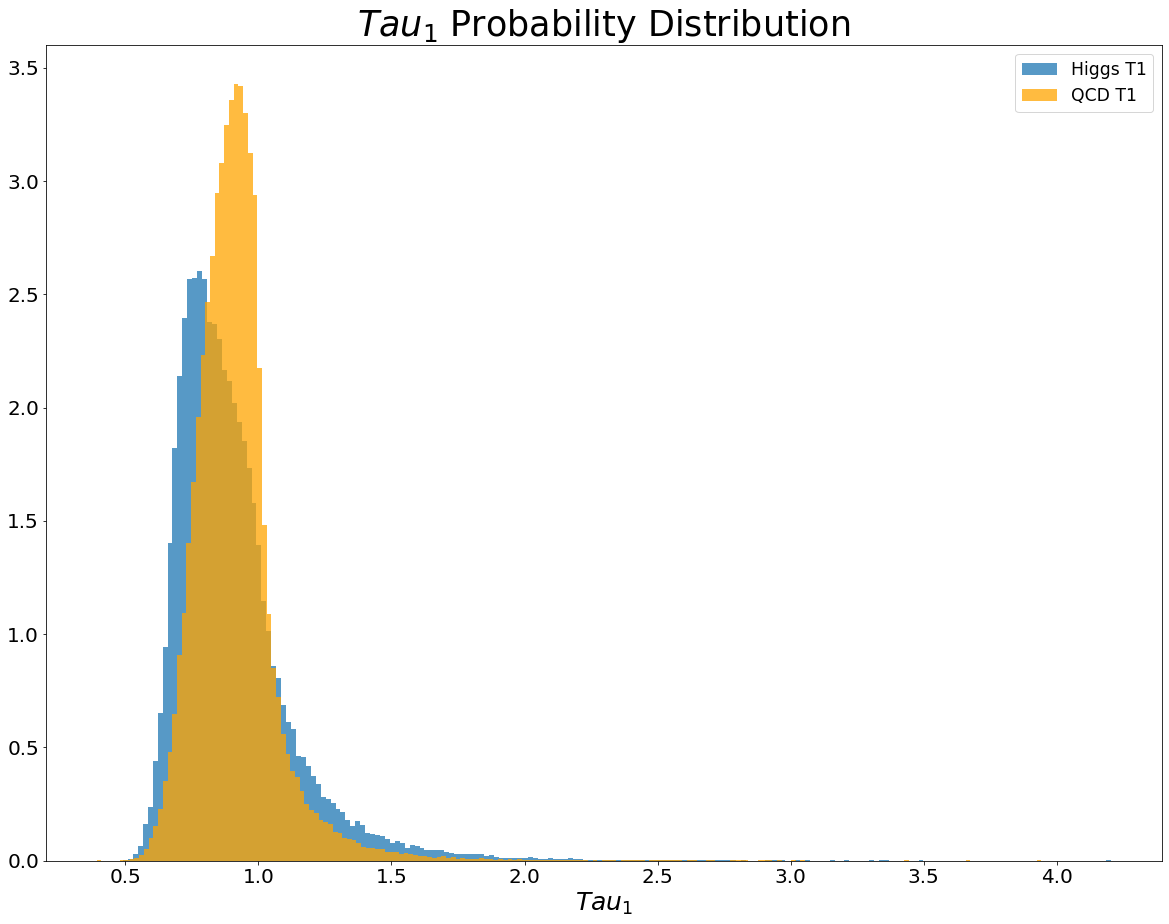

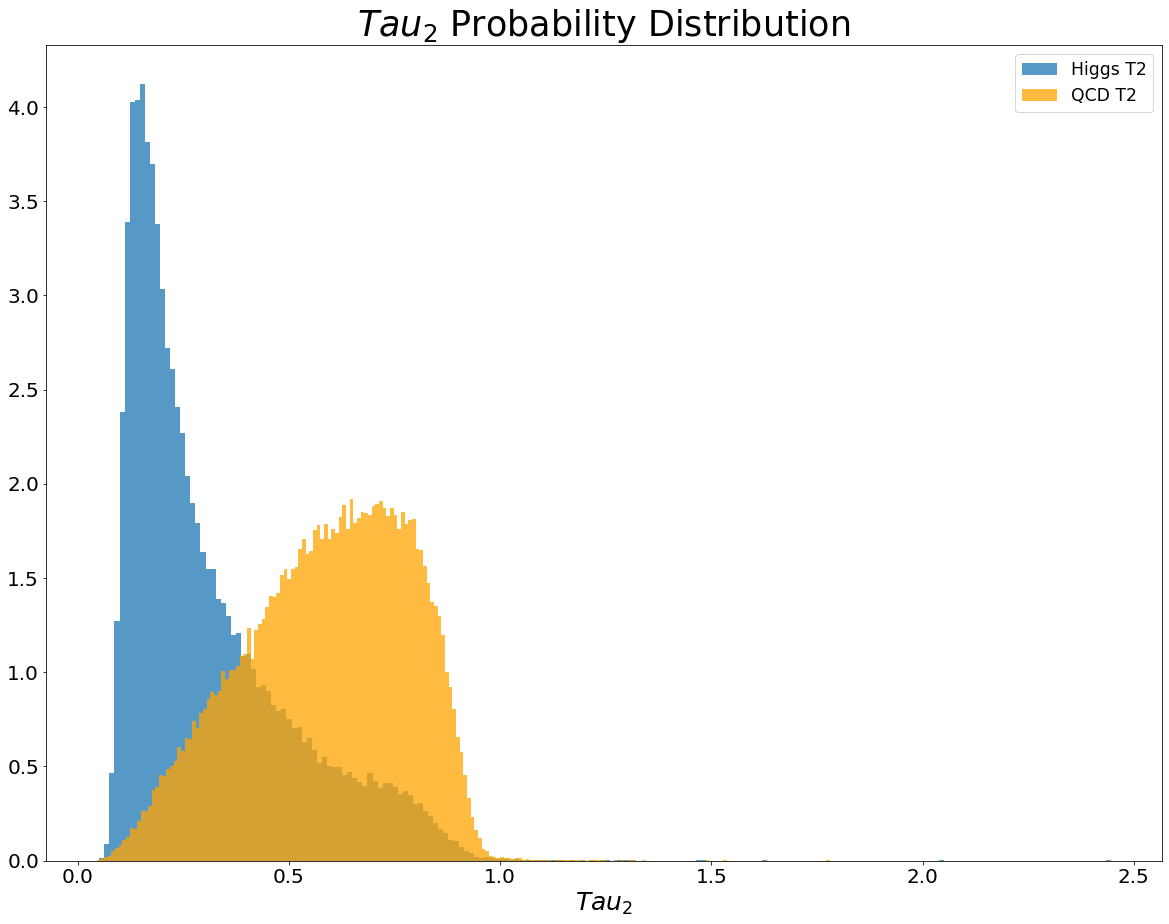

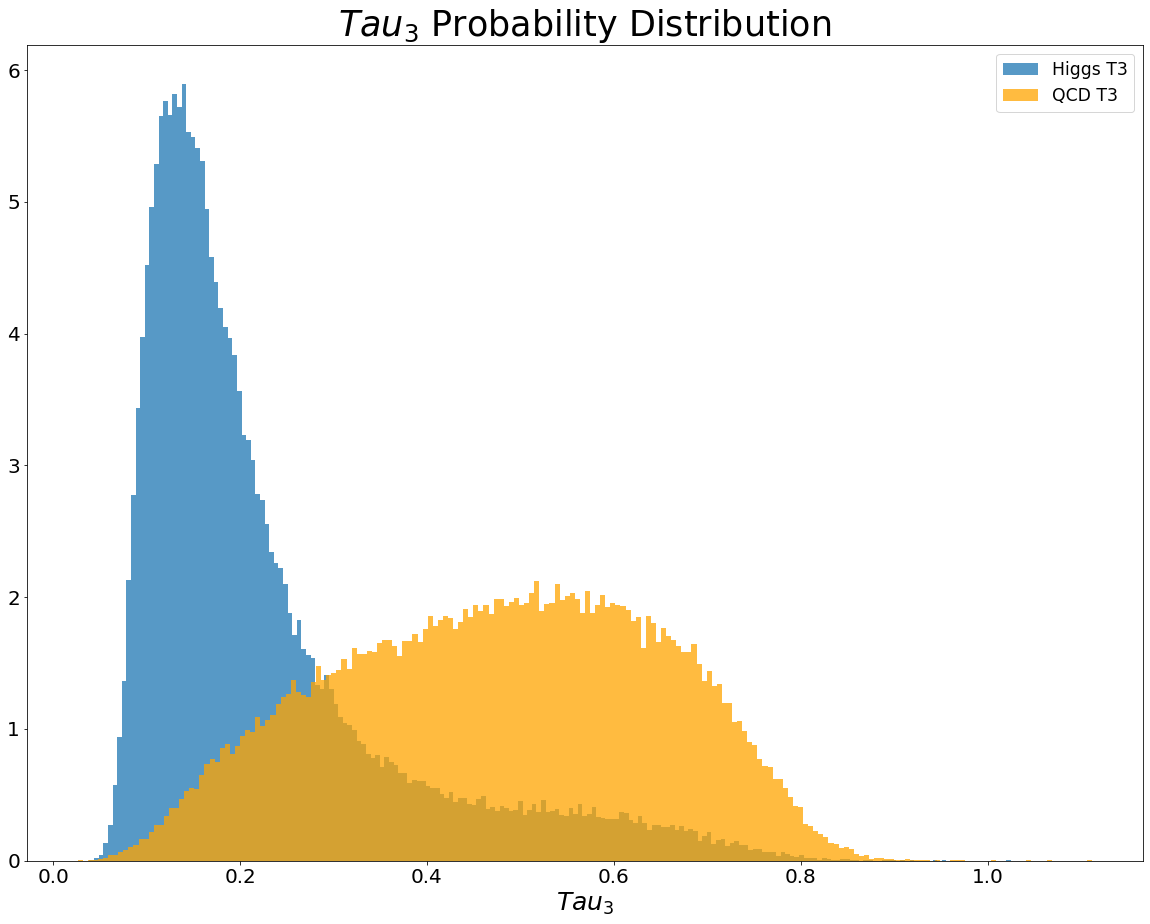

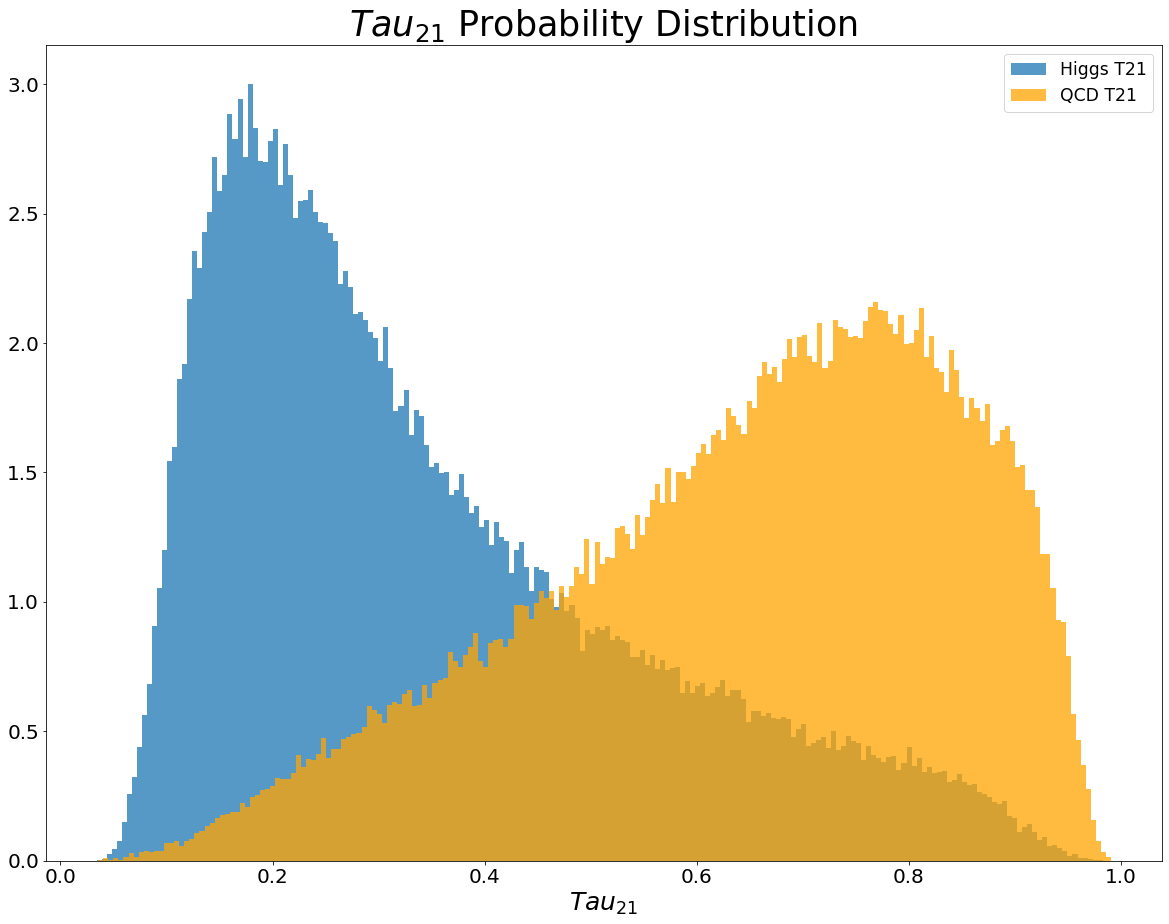

In [124]:
# Higgs and QCD Tau1 Histogram 
fig, ax = plt.subplots(1,1)
ax.hist(hT1, bins = 200, label='Higgs T1', alpha=0.75, density=True)
ax.hist(qT1, bins = 200, label='QCD T1', color='orange', alpha=0.75, density=True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('$Tau_1$', size = 25)
ax.set_title('$Tau_1$ Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

# Higgs and QCD Tau2 Histogram
fig, ax = plt.subplots(1,1)
ax.hist(hT2, bins=200, label='Higgs T2', alpha=0.75, density=True)
ax.hist(qT2, bins=200, color='orange', alpha=0.75, label='QCD T2', density=True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('$Tau_2$', size = 25)
ax.set_title('$Tau_2$ Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

# Higgs and QCD Tau3 Histogram
fig, ax = plt.subplots(1,1)
ax.hist(hT3, bins = 200, alpha=0.75, label='Higgs T3', density=True)
ax.hist(qT3, bins = 200, color='orange', alpha=0.75, label='QCD T3', 
        density=True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('$Tau_3$', size = 25)
ax.set_title('$Tau_3$ Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')

# Tau 2-1
fig, ax = plt.subplots(1,1)
ax.hist(hT21, bins = 200, alpha=0.75, label='Higgs T21', density=True)
ax.hist(qT21, bins = 200, color='orange', alpha=0.75, label='QCD T21', 
        density=True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('$Tau_{21}$', size = 25)
ax.set_title('$Tau_{21}$ Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
#plt.yscale('log')

plt.show()

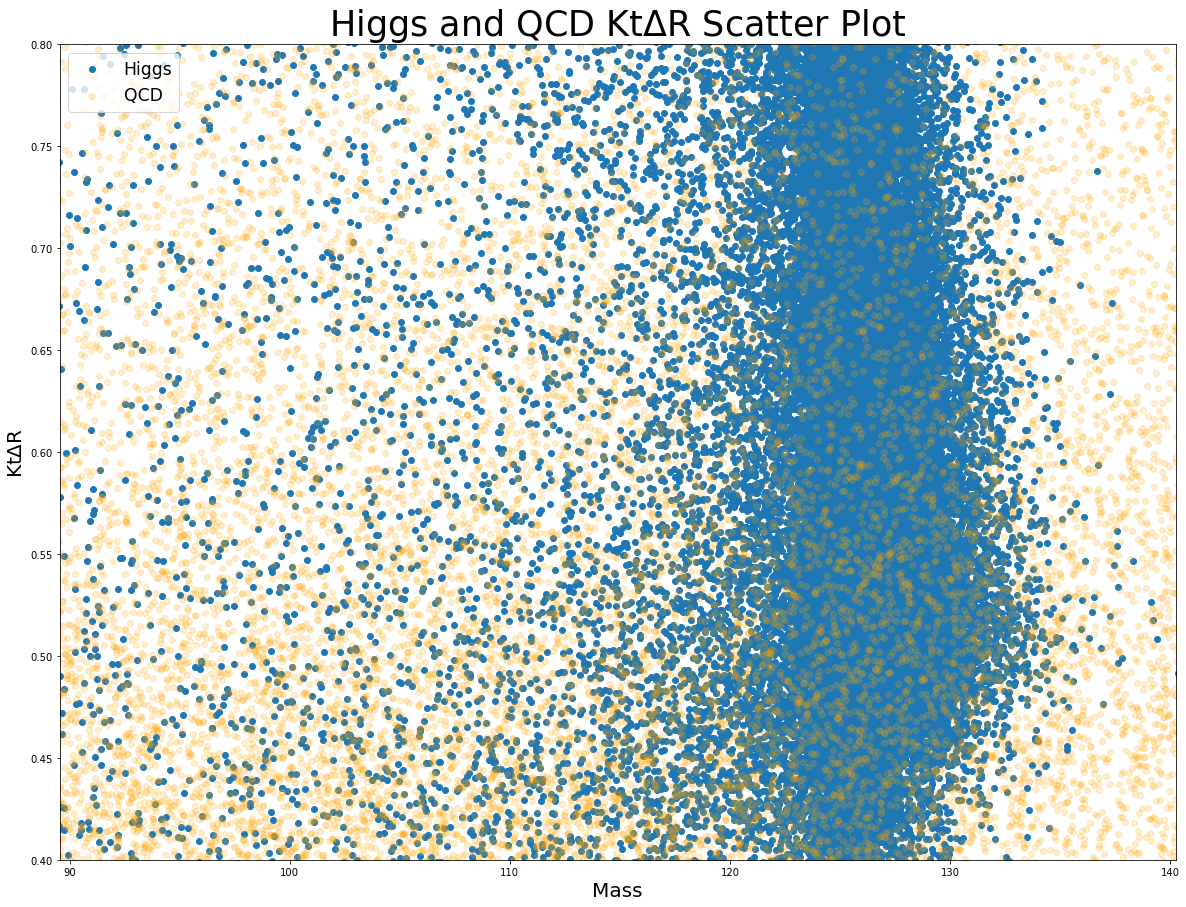

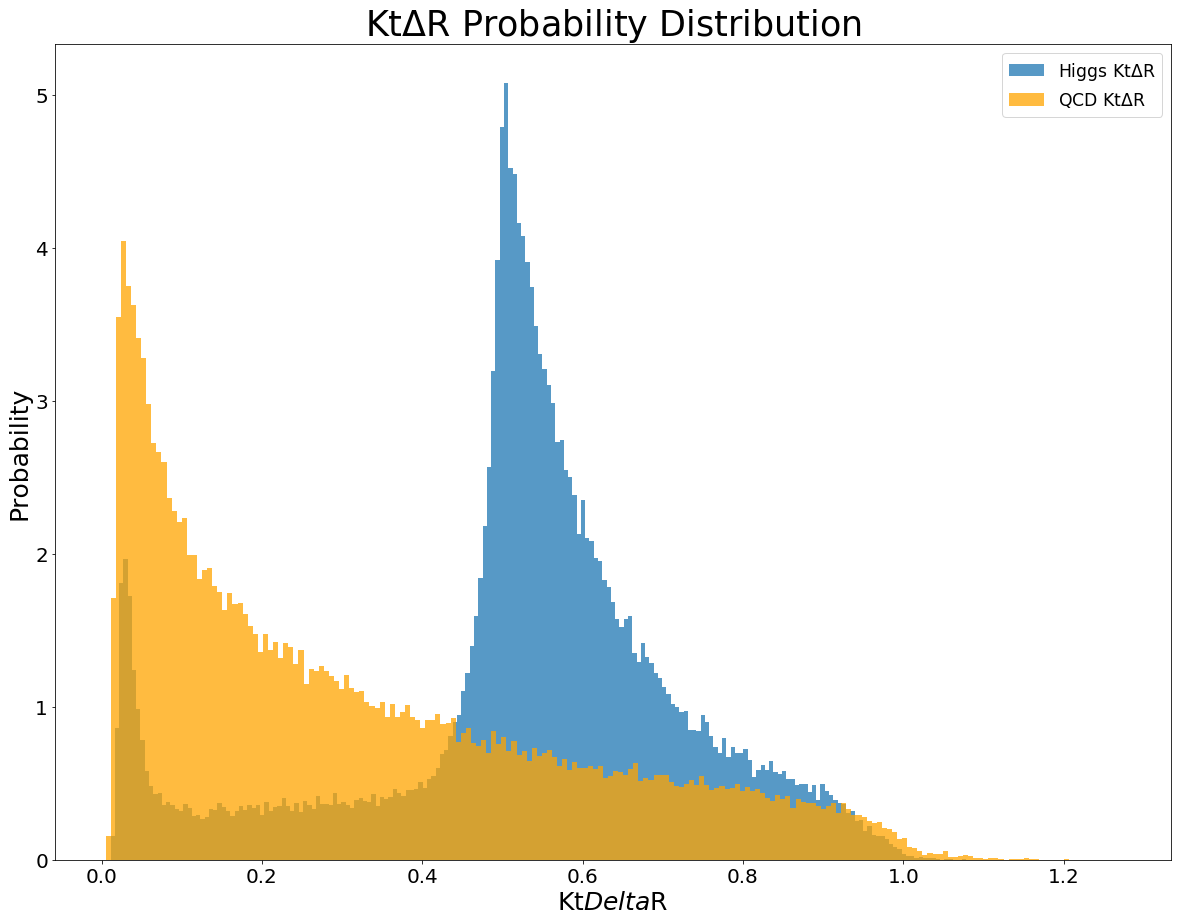

In [114]:
# Higgs and QCD KtDeltaR Histogram 
fig, ax = plt.subplots(1,1)
ax.scatter(hMass, hKtDeltaR, label='Higgs')
ax.scatter(qMass, qKtDeltaR, color='orange', alpha=0.2, label='QCD')
ax.legend(loc='best', fontsize='xx-large')
ax.set_xlabel('Mass', size=20)
ax.set_ylabel('Kt$\Delta$R', size=20)
plt.xlim(MeanM-StdM, MeanM+StdM)
plt.ylim(0.4,0.8)
ax.set_title('Higgs and QCD Kt$\Delta$R Scatter Plot', size=35)

fig, ax = plt.subplots(1,1)
ax.hist(hKtDeltaR, bins = 200, label='Higgs Kt$\Delta$R', alpha=0.75, density=True)
ax.hist(qKtDeltaR, bins = 200, label='QCD Kt$\Delta$R', color='orange', alpha=0.75, density=True)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Kt$Delta$R', size = 25)
ax.set_ylabel('Probability', size=25)
ax.set_title('Kt$\Delta$R Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

- From the scatter plots and histograms, as well as the papers provided, we determined the following:
   - Factors that have the most significant discriminating power on the background vs the signal include:
     - mass
     - transverse momentum 
       - $p_T$
     - Energy correlation functions
       - $e_2$
       - $e_3$
     - Subjettiness
       - $\tau_3$
       - $\tau_2$
     - $\Delta R$ of two subjects within the large-R jet
       - $Kt\Delta R$
     - Pseudorapidity
       - $\eta$

- We can use these variables to optimize the signal detection for Higgs boson detection and rejection of the QCD background